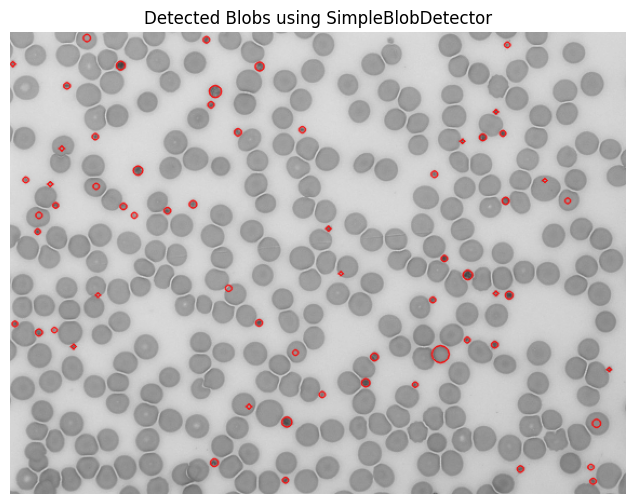

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "platelets.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

params = cv2.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 10
params.maxArea = 200

params.filterByCircularity = True
params.minCircularity = 0.6

params.filterByConvexity = True
params.minConvexity = 0.7

params.filterByInertia = True
params.minInertiaRatio = 0.1

detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(image)


image_with_blobs = cv2.drawKeypoints(
    image, keypoints, np.array([]), (255, 0, 0),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)


plt.figure(figsize=(10, 6))
plt.imshow(image_with_blobs, cmap='gray')
plt.title("Detected Blobs using SimpleBlobDetector")
plt.axis("off")
plt.show()

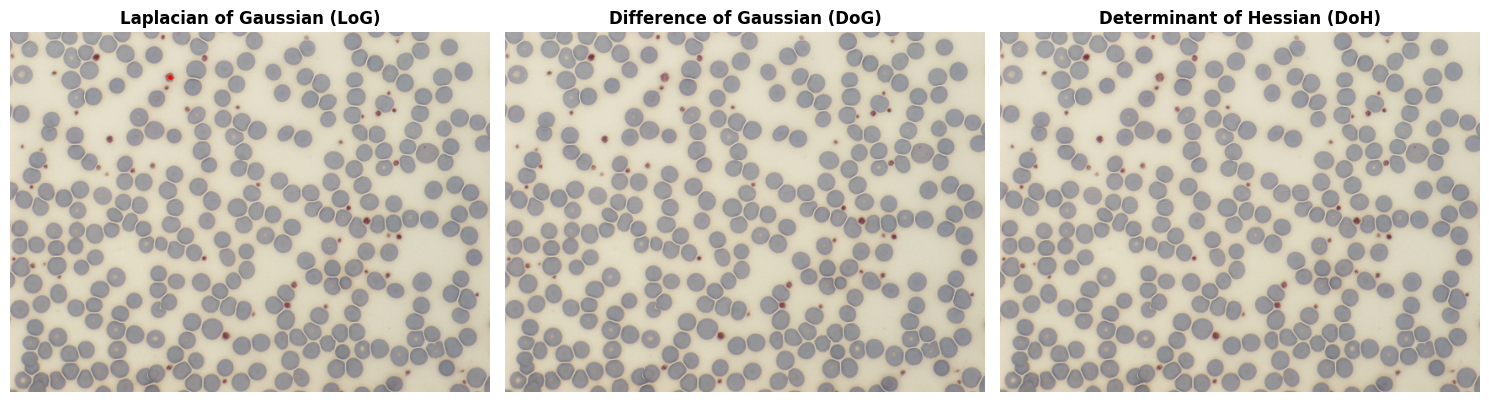

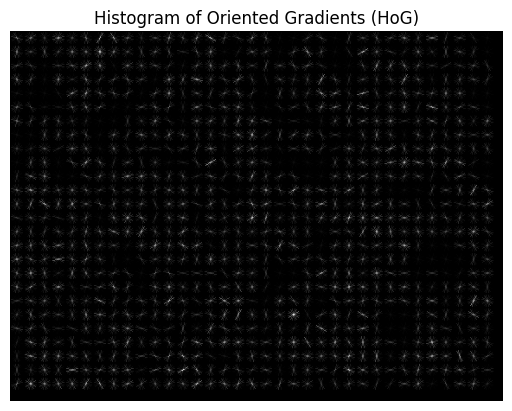

In [3]:
from skimage.feature import blob_log, blob_dog, blob_doh, hog
from skimage import img_as_float


image_path = "platelets.png"
image_color = cv2.imread(image_path)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
image_float = img_as_float(image_gray)


image_hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)


lower_purple = np.array([120, 50, 50])
upper_purple = np.array([160, 255, 255])


mask_purple = cv2.inRange(image_hsv, lower_purple, upper_purple)


blobs_log = blob_log(image_float, min_sigma=1, max_sigma=3, num_sigma=3, threshold=0.02, overlap=0.1)
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2) 


blobs_dog = blob_dog(image_float, min_sigma=1, max_sigma=3, sigma_ratio=1.6, threshold=0.02, overlap=0.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)


blobs_doh = blob_doh(image_float, min_sigma=1, max_sigma=3, num_sigma=3, threshold=0.01, overlap=0.1)


def filter_blobs(blobs):
    return np.array([blob for blob in blobs if mask_purple[int(blob[0]), int(blob[1])] > 0])


filtered_log = filter_blobs(blobs_log)
filtered_dog = filter_blobs(blobs_dog)
filtered_doh = filter_blobs(blobs_doh)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Laplacian of Gaussian (LoG)", "Difference of Gaussian (DoG)", "Determinant of Hessian (DoH)"]
blobs_list = [filtered_log, filtered_dog, filtered_doh]

for ax, title, blobs in zip(axes, titles, blobs_list):
    ax.imshow(image_color, cmap='gray')
    for y, x, r in blobs:
        ax.add_patch(plt.Circle((x, y), r, color='red', linewidth=1.5, fill=False))
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.axis("off")

plt.tight_layout()
plt.show()

fd, hog_image = hog(image_gray, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

plt.imshow(hog_image, cmap='gray')
plt.title("Histogram of Oriented Gradients (HoG)")
plt.axis("off")
plt.show()

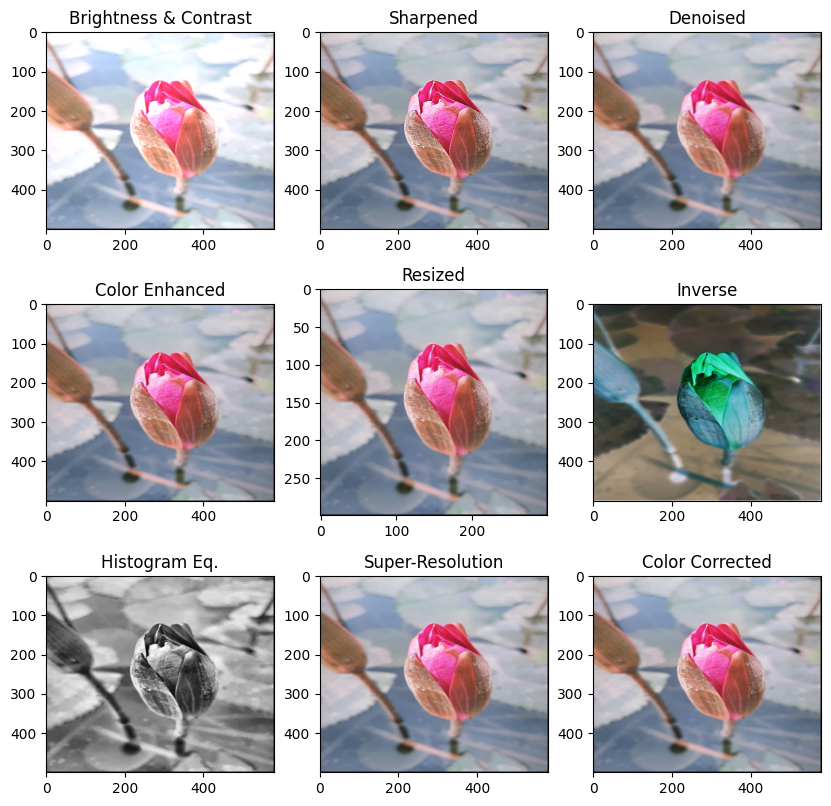

In [ ]:

from skimage.exposure import equalize_hist

filepath = "flower.png"
# Load Image
def load_image(filepath):
    with open(filepath, 'rb') as f:
        img = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def adjust_brightness_contrast(image, alpha=1.2, beta=20):
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def remove_noise(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def enhance_color(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def resize_image(image, width, height):
    return cv2.resize(image, (width, height), interpolation=cv2.INTER_LINEAR)

def inverse_transform(image):
    return 255 - image

def histogram_equalization(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    equalized = clahe.apply(gray)
    return equalized

def super_resolution(image):
    upscaled = cv2.pyrUp(image)
    return cv2.pyrDown(upscaled)

def color_correction(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower = np.array([0, 0, 0])
    upper = np.array([255, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)
    return cv2.bitwise_and(image, image, mask=mask)

# Example Usage
if __name__ == "__main__":
    img_path = "flower.png"
    image = load_image(img_path)

    bright_contrast = adjust_brightness_contrast(image)
    sharpened = sharpen_image(image)
    noise_removed = remove_noise(image)
    color_enhanced = enhance_color(image)
    resized = resize_image(image, 300, 300)
    inverse = inverse_transform(image)
    hist_eq = histogram_equalization(image)
    super_res = super_resolution(image)
    color_corrected = color_correction(image)

    # Display Results
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))
    plt.subplot(3, 3, 1), plt.imshow(bright_contrast), plt.title('Brightness & Contrast')
    plt.subplot(3, 3, 2), plt.imshow(sharpened), plt.title('Sharpened')
    plt.subplot(3, 3, 3), plt.imshow(noise_removed), plt.title('Denoised')
    plt.subplot(3, 3, 4), plt.imshow(color_enhanced), plt.title('Color Enhanced')
    plt.subplot(3, 3, 5), plt.imshow(resized), plt.title('Resized')
    plt.subplot(3, 3, 6), plt.imshow(inverse, cmap='gray'), plt.title('Inverse')
    plt.subplot(3, 3, 7), plt.imshow(hist_eq, cmap='gray'), plt.title('Histogram Eq.')
    plt.subplot(3, 3, 8), plt.imshow(super_res), plt.title('Super-Resolution')
    plt.subplot(3, 3, 9), plt.imshow(color_corrected), plt.title('Color Corrected')
    plt.show()

Number of candies detected: 20


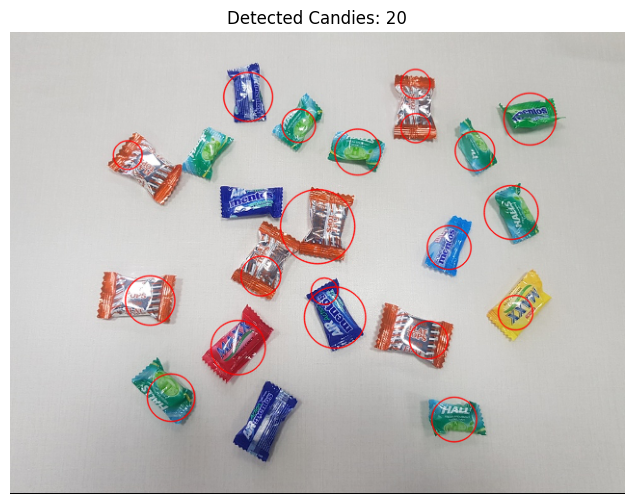

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "candies.png"
image_color = cv2.imread(image_path)
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 350
params.maxArea = 4000

params.filterByConvexity = True
params.minConvexity = 0.6

params.filterByInertia = True
params.minInertiaRatio = 0.1

params.minThreshold = 10
params.maxThreshold = 200
params.thresholdStep = 10

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(image_gray)

image_with_blobs = cv2.drawKeypoints(
    image_color, keypoints, np.array([]), (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

num_candies = len(keypoints)
print("Number of candies detected:", num_candies)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(image_with_blobs, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Candies: {num_candies}")
plt.axis("off")
plt.show()
